# **Sentiment Analysis**

Sentiment analysis is the process of understanding the opinion of an author about a subject. In this sample datasets used

* [movie revies](https://github.com/sarathchandrikak/Machine-Learning/blob/main/NLP/sentiment_analysis/IMDB_sample.csv)
* [amazon product reviews](https://github.com/sarathchandrikak/Machine-Learning/blob/main/NLP/sentiment_analysis/amazon_reviews_sample.csv)
* [twitter airline sentiment](https://github.com/sarathchandrikak/Machine-Learning/blob/main/NLP/sentiment_analysis/Tweets.csv)


### Steps performed

* Basic information about size of reviews
* Word clouds - to understand important words
* Features for the length of reviews, number of words, number of sentences
* Feature detecting the language of a review
* Bag of words - related to frequency of words
* Tfidf Vectorization - related to how frequently a word occurs in a document with respect to the rest of the documents. Helps to find important words
* Arguments for vectorizers
    * stop-words: removed non-informative, frequently occuring words
    * n-gram range: introduced use of phrases not just single words
    * control size of vocabulary: post n-gram or matrix construction, limit the features by specifying max_features, max_df, min_df
    * capture a pattern of tokens: remove digits or any unnecessary characters
* Lemmatization and Stemming techniques
* Logistic Regression classifier to predict the sentiment
* Evaluated with accuracy and confusion matrix

## **Importing required packages**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
tweets = pd.read_csv("Tweets.csv")

In [6]:
# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(ENGLISH_STOP_WORDS))
vect.fit(tweets.text)
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

In [7]:
# Update existing stop words with own words
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=list(my_stop_words))
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())
print(X_df.head())

    aa  agent  airport  americanair       amp  bag  baggage  bags  best  \
0  0.0    0.0      0.0          0.0  0.000000  0.0      0.0   0.0   0.0   
1  0.0    0.0      0.0          0.0  0.000000  0.0      0.0   0.0   0.0   
2  0.0    0.0      0.0          0.0  0.000000  0.0      0.0   0.0   0.0   
3  0.0    0.0      0.0          0.0  0.537247  0.0      0.0   0.0   0.0   
4  0.0    0.0      0.0          0.0  0.000000  0.0      0.0   0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst  yes  
0   0.0    0.0  0.0  
1   0.0    0.0  0.

In [8]:
# Build a vectorizer from the text column, specifying the pattern of tokens

vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names_out()))

Length of vectorizer:  11893


In [9]:
# Comparing, considering with & without pattern

vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ' + str(len(vect1.get_feature_names_out())) + "\n" + 'Length of vectorizer 2: ' + str(len(vect2.get_feature_names_out())))

Length of vectorizer 1: 15051
Length of vectorizer 2: 643


In [10]:
# Check if nltk and stop words are already present

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Converting text column data into tokens

# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [12]:
# Create separate lists containing letters alone, digits alone, letters and digits
tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets

In [13]:
tokens = [word_tokenize(item) for item in tweets_list]
# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


## **Stemming and Lemmatization**

In [14]:
tweets_array = np.array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@united he has no priority and Iove it',
       '@united Pleased to be a Premier Platinum',
       '@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.'])

In [15]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(item) for item in tweets_array]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweets_array] for tweet in tokens]
# Print the first element of the list
print(stemmed_tokens[0])

['@virginamerica what @dhepburn said.', "@virginamerica plus you've added commercials to the experience... tacky.", "@virginamerica i didn't today... must mean i need to take another trip!", '@united he has no priority and iove it', '@united pleased to be a premier platinum', '@united how can you not put my bag on plane to seattle. flight 1212. waiting  in line to talk to someone about my bag. status should matter.']


## **TFIDF, BOW implementation**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS, CountVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(tweets.text)
vect2 = TfidfVectorizer(max_features=100).fit(tweets.text)



# Transform the vectorizers
X1 = vect1.transform(tweets.text)
X2 = vect2.transform(tweets.text)
# Create DataFrames from the vectorizers
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names_out())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  again  airline  all  am  americanair  amp  an  and  ...  was  \
0      0      0      0        0    0   0            0    0   0    0  ...    0   
1      0      0      0        0    0   0            0    0   0    0  ...    0   
2      0      0      0        0    0   0            0    0   0    0  ...    0   
3      0      0      0        0    0   0            0    1   0    0  ...    0   
4      1      0      0        0    0   0            0    0   0    1  ...    0   

   we  what  when  why  will  with  would  you  your  
0   0     1     0    0     0     0      0    0     0  
1   0     0     0    0     0     0      0    1     0  
2   0     0     0    0     0     0      0    0     0  
3   0     0     0    0     0     0      0    0     1  
4   0     0     0    0     0     0      0    0     0  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
       about  after  again  airline  all   am  americanair       amp   an  \
0  0.000000    0.0    0.0      0.

## **Problem Solving**

In [17]:
reviews = pd.read_csv("amazon_reviews_sample.csv")
reviews.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [18]:
# Creating positive reviews by extracting top 100 positive reviews
positive_reviews_df = reviews[reviews["score"] == 1]
positive_reviews_df = positive_reviews_df.iloc[0:100]['review']
positive_reviews = ''
for i in list(positive_reviews_df):
    positive_reviews = positive_reviews + i
positive_reviews

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\r\n The best soundtrack ever to anything.: I\'m reading a lot of reviews saying that this is the best \'game soundtrack\' and I figured that I\'d write a review to disagree a bit. This in my opinino is Yasunori Mitsuda\'s ultimate masterpiece. The music is timeless and I\'m been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\r\n Amazing!: This soundtrack is my favorite music 

## **Step-1 Generating Word Cloud and feature creation**

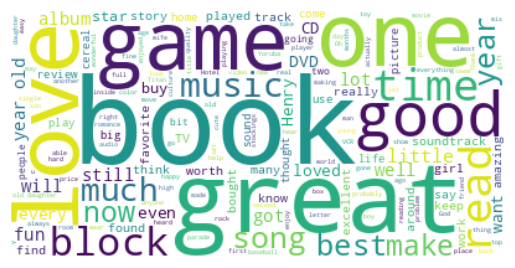

In [19]:
# Create and generate a word cloud image
cloud_positives = WordCloud(background_color='white').generate(positive_reviews)

# Display the generated wordcloud image
plt.imshow(cloud_positives, interpolation='bilinear')
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [20]:
# Tokenize each item in the review column
word_tokens = [word_tokenize(review) for review in reviews.review]

# Create an empty list to store the length of the reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens

## **Step2: Building a Vectorizer**

In [23]:
# Import the TfidfVectorizer and default list of English stop words
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS), ngram_range=(1, 2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(reviews.review)
# Create sparse matrix from the vectorizer
X = vect.transform(reviews.review)

# Create a DataFrame
reviews_transformed = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', reviews_transformed.head())

Top 5 rows of the DataFrame: 
    able  action  actually  ago  album   amazing  amazon  author      away  \
0   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.274041   
1   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
2   0.0     0.0       0.0  0.0    0.0  0.382773     0.0     0.0  0.000000   
3   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   
4   0.0     0.0       0.0  0.0    0.0  0.000000     0.0     0.0  0.000000   

   bad  ...      work  works  world  worst     worth  writing  written  wrong  \
0  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
1  0.0  ...  0.000000    0.0    0.0    0.0  0.219408      0.0      0.0    0.0   
2  0.0  ...  0.142935    0.0    0.0    0.0  0.160089      0.0      0.0    0.0   
3  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   
4  0.0  ...  0.000000    0.0    0.0    0.0  0.000000      0.0      0.0    0.0   

   year     years  

In [27]:
reviews_transformed['score'] = reviews.score
reviews_transformed

,able,action,actually,ago,album,amazing,amazon,author,away,bad,...,works,world,worst,worth,writing,written,wrong,year,years,score
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.274041,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.219408,0.0,0.0,0.0,0.0,0.208885,1
2,0.0,0.0,0.0,0.0,0.0,0.382773,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.160089,0.0,0.0,0.0,0.0,0.152410,1
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.308646,0.000000,0.0,...,0.0,0.0,0.0,0.143748,0.0,0.0,0.0,0.0,0.000000,1
9996,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.211433,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1
9997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.261721,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0
9998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0


## **Step3: Building a classifier**

In [33]:
# Define X and y
y = reviews_transformed["score"]
X = reviews_transformed.drop('score', axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

# Train a logistic regression
log_reg = LogisticRegression().fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_predicted, y_test))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.789
[[0.412 0.114]
 [0.097 0.377]]
